You are provided with data (test_data.xlsx) from a retail shop that consists of 8 columns (Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, and Country).

You are supposed to analyze data in indexes between 1  [144400, 148400]! Do not forget to clean the data of NaNs, as failing so may render your answers invalid!
1.
github.com
github.com

Fill in your answers to the text below, as if it were your report from the data.


- The amount of unique invoices in the provided dataset for indexes (144400, 148400) is equal to 202 (integer).

- The country with the most orders is United Kingdom (string) with the amount of 190 (integer).

- The country with the least orders is Spain (string) with the amount of 1 (integer).

- The highest total price per item in one order was 1301.52 in order with id ***REFER CODE***.

- The second highest spending customer with id 13694 (integer) ordered a total of 25 (integer) times.

Let me know if you have any other questions or tasks!

In [158]:
#######################READING EXCEL FILE####################
from google.colab import files
import pandas as pd

# Step 1: Upload the Excel file
uploaded = files.upload()

# Step 2: Get the file name (key from the uploaded dictionary)
file_name = list(uploaded.keys())[0]

# Step 3: Load the Excel file into a Pandas DataFrame
df = pd.read_excel(file_name)

# Display the first few rows of the DataFrame
print(df.head())


Saving test_data.xlsx to test_data (1).xlsx
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [159]:
#Choosing only specific indices
df_mod=df.iloc[144400:148401,:]

In [ ]:
#Cleaning Data
df_mod.isnull().sum()
df_cleaned = df_mod.dropna()
df_cleaned.isnull().sum()

In [163]:
#Head check
df_cleaned.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
144400,503152,22398,MAGNETS PACK OF 4 SWALLOWS,24,2010-03-30 12:27:00,1.06,14298.0,United Kingdom
144401,503152,22555,PLASTERS IN TIN STRONGMAN,24,2010-03-30 12:27:00,1.45,14298.0,United Kingdom
144402,503152,22551,PLASTERS IN TIN SPACEBOY,24,2010-03-30 12:27:00,1.45,14298.0,United Kingdom
144403,503152,22556,PLASTERS IN TIN CIRCUS PARADE,24,2010-03-30 12:27:00,1.45,14298.0,United Kingdom
144404,503152,22553,PLASTERS IN TIN SKULLS,24,2010-03-30 12:27:00,1.45,14298.0,United Kingdom


In [164]:
#Question 1 : The amount of unique invoices in the provided dataset for indexes (144400, 148400)
df_cleaned.nunique()['Invoice']

202

In [58]:
#Question 2.1 : The country with the most orders is United Kingdom (string) with the amount of 190 (integer)
#Grouping by country with higest orders
df_grouped_highest_count= df_cleaned.groupby('Country').count()#UK has higest
print(df_grouped_highest_count)

                InvoiceNo  StockCode  Description  Quantity  InvoiceDate  \
Country                                                                    
Belgium                14         14           14        14           14   
EIRE                    2          2            2         2            2   
France                 30         30           30        30           30   
Germany               128        128          128       128          128   
Spain                   3          3            3         3            3   
United Kingdom       2822       2822         2822      2822         2822   

                UnitPrice  CustomerID  
Country                                
Belgium                14          14  
EIRE                    2           2  
France                 30          30  
Germany               128         128  
Spain                   3           3  
United Kingdom       2822        2822  


In [165]:
#Question 2.1 : The country with the most orders is United Kingdom (string) with the amount of 190 (integer)
#Now we need to group by Invoice of UK as there could be multiple

df_cleaned[df_cleaned["Country"] == "United Kingdom"].groupby(by=["Invoice"]).count().shape[0]

190

In [169]:
# Question 3 :The country with the least orders is Spain (string) with the amount of 1 (integer).
df_cleaned[df_cleaned["Country"] == "Spain"].groupby(by=["Invoice"]).count().shape[0]

1

In [175]:

# Question 4 :The highest total price per item in one order was 1301.52 in order with id REFER CODE.


df_cleaned['Total_cost'] = df_cleaned['Quantity'] * df_cleaned['Price']
total_highest_cost = df_cleaned['Total_cost'].max() #Total cost
#cust_wit_total_cost = df_cleaned[df_cleaned['CustomerID']== 18102.0].count()
total_highest = df_cleaned.sort_values('Total_cost',ascending=False).head()
print(total_highest_cost)
print(total_highest)
#--------------------------------------------------------------------------------------------------------------------------------
#---------------------------2 possible answers --------------for ID could be customer id after sort :
#---------------------INVOICE ID : 503186        AND CUSTOMER ID : 18102--------------------------------------------

1301.52
       Invoice StockCode                      Description  Quantity  \
145402  503186     21623     VINTAGE UNION JACK MEMOBOARD       204   
145408  503186     85067    CREAM SWEETHEART WALL CABINET        81   
145405  503186     22456  NATURAL SLATE CHALKBOARD LARGE        204   
145404  503186     22189          CREAM HEART CARD HOLDER       324   
145407  503186     22177     5 HOOK BLACKBOARD ORGANISER        108   

               InvoiceDate  Price  Customer ID         Country  Total_cost  
145402 2010-03-30 14:47:00   6.38      18102.0  United Kingdom     1301.52  
145408 2010-03-30 14:47:00  12.89      18102.0  United Kingdom     1044.09  
145405 2010-03-30 14:47:00   3.67      18102.0  United Kingdom      748.68  
145404 2010-03-30 14:47:00   2.30      18102.0  United Kingdom      745.20  
145407 2010-03-30 14:47:00   6.68      18102.0  United Kingdom      721.44  


<ipython-input-175-a4db945588f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Total_cost'] = df_cleaned['Quantity'] * df_cleaned['Price']


In [177]:
# Question 5 :The second highest spending customer with id 13694 (integer) ordered a total of 25 (integer) times.

print(df_cleaned.groupby('Customer ID')['Total_cost'].sum().sort_values(ascending=False)) #In descending we get 13694 with total cost as 3333.30
print(df_cleaned[df_cleaned['Customer ID']==13694.0].count()) #Gets the count of 25



Customer ID
18102.0    7604.87
13694.0    3333.30
15125.0    3056.39
17428.0    2174.84
13952.0    1788.35
            ...   
14607.0     -57.67
14740.0     -67.20
12748.0    -115.80
16019.0    -144.00
14481.0    -376.17
Name: Total_cost, Length: 171, dtype: float64
Invoice        25
StockCode      25
Description    25
Quantity       25
InvoiceDate    25
Price          25
Customer ID    25
Country        25
Total_cost     25
dtype: int64


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>PCA and K-Means Clustering Report</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            margin: 20px;
            padding: 0;
        }
        h1 {
            color: #333;
        }
        p {
            margin-bottom: 10px;
        }
        .hint {
            background-color: #f9f9f9;
            border-left: 4px solid #ccc;
            padding: 10px;
            margin-top: 20px;
        }
    </style>
</head>
<body>
    <h1>PCA and K-Means Clustering</h1>
    <p>You are provided with data (<strong>data_test_clustering_A1.csv</strong>) that consists of 8 features for each row.</p>
<p>Analyze the data within the index range <strong>(42482, 43476)</strong>.</p><p>All floats are rounded to 3 digits!</p>
<h2>Data Analysis Findings</h2>
    <ul>
        <li>Based on 2D PCA visualization of data between indexes <strong>(42482, 43476)</strong>, we can identify <strong>4 (integer)</strong> distinct clusters.</li>
        <li>We randomly selected two rows (indexes) within this range for further analysis. The selected indexes are <strong>(11, 832)</strong>.</li>
    </ul>
<h2>PCA Component Values</h2>
    <ul>
        <li>For index 11, the most significant PCA component value is <strong>485.997</strong>.</li>
        <li>For index 832, the second most significant PCA component value is:<li><strong>-334.988 (float)</strong></li>
        </li>
    </ul>
<h2>Euclidean Distance</h2>                <li><strong>821.018 (float)</strong></li>
    <p>The Euclidean distance between the PCA components of indexes <strong>(11, 832)</strong> is <strong>(float)</strong>.</p>
<h2>K-Means Clustering Results</h2>
    <ul>
        <li>After applying K-Means clustering with <strong>random_state=0</strong> to the specified data segment, it was found that:</li>
        <ul>
            <li>The features from index 11 belong to cluster label <strong>1</strong>.</li>
            <li>The features from index 832 belong to cluster label <strong>3</strong>.</li>
        </ul>
    </ul>
 <div class="hint">
        <h3>Hints:</h3>
        <ul>
            <li>Using a different <strong>random_state</strong> for K-Means clustering will result in incorrect answers.</li>
            <li>Consider using methods like <strong>PCA</strong>, <strong>KMeans</strong>, <strong>Euclidean distance</strong>, <strong>fit_transform</strong>, and <strong>fit_predict</strong> in your analysis.</li>
        </ul>
    </div>
</body>
</html>


In [141]:
#importing basic stuffs
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean
from google.colab import files
import pandas as pd


In [142]:
# Upload the file
uploaded = files.upload()

# Load the CSV into a DataFrame
df = pd.read_csv(next(iter(uploaded)))
print(df.head())


Saving data_test_clustering_A1.csv to data_test_clustering_A1.csv
   Unnamed: 0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0           0  -3.570594  -8.634479   2.583979  10.796969        0.0   
1           1  -5.141801  -9.480061  -0.452732  10.239413        0.0   
2           2   5.442349   6.900069   0.857940  -9.532804        0.0   
3           3   7.740632  -7.739564   3.524483   1.975055        0.0   
4           4  -4.273923  -8.461581   1.884085   9.813837        0.0   

   Feature_6  Feature_7  Feature_8  
0        0.0        0.0        0.0  
1        0.0        0.0        0.0  
2        0.0        0.0        0.0  
3        0.0        0.0        0.0  
4        0.0        0.0        0.0  


In [149]:
#PCA------------------------FROM Q paper with 5 out of 8 marks ------------Nikhil Thorat
#data = np.random.randn(858, 8)  # Placeholder for the sliced data between indexes

data = df.iloc[42482:43476,:]
# Step 1: Perform PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(data)

# Step 2: Identify PCA values for indexes 11 and 832
index_11 = pca_transformed[11]
index_832 = pca_transformed[832]

print(index_11)
print(index_832)

[-485.49718712    3.20567685]
[335.48920336  10.40011297]


In [151]:
#Euclidian and Kmeans
# Step 3: Calculate the Euclidean distance
euclidean_distance = euclidean(index_11, index_832)

# Step 4: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
cluster_labels = kmeans.fit_predict(data)

# Step 5: Retrieve cluster labels for indexes 520 and 135
cluster_label_11 = cluster_labels[520]
cluster_label_832 = cluster_labels[135]

In [153]:
#Print Final results
# Display the results
print(f"Index 520 - Most significant PCA component value: {index_11[0]}")
print(f"Index 135 - Second significant PCA component value: {index_832[0]}")
print(f"Euclidean distance between indexes 520 and 135: {euclidean_distance}")
print(f"Cluster label for index 520: {cluster_label_11}")
print(f"Cluster label for index 135: {cluster_label_832}")

Index 520 - Most significant PCA component value: -485.49718711512105
Index 135 - Second significant PCA component value: 335.4892033646247
Euclidean distance between indexes 520 and 135: 821.0179128764545
Cluster label for index 520: 0
Cluster label for index 135: 3


In [156]:
#-------------------------------------Graphing stuffs------------------------------------------------
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


x=data.iloc[:,1:]
scaler=StandardScaler()
scaled_data= scaler.fit_transform(x)
pca=PCA(n_components=2)
pca_result=pca.fit_transform(scaled_data)
print(pca_result)

[[ 1.51524389  1.14449011]
 [ 1.54117008  1.22666423]
 [ 0.69664246  0.16620867]
 ...
 [ 0.43643067 -1.06291735]
 [ 1.31971064  1.30750241]
 [-0.43118694 -1.23516883]]


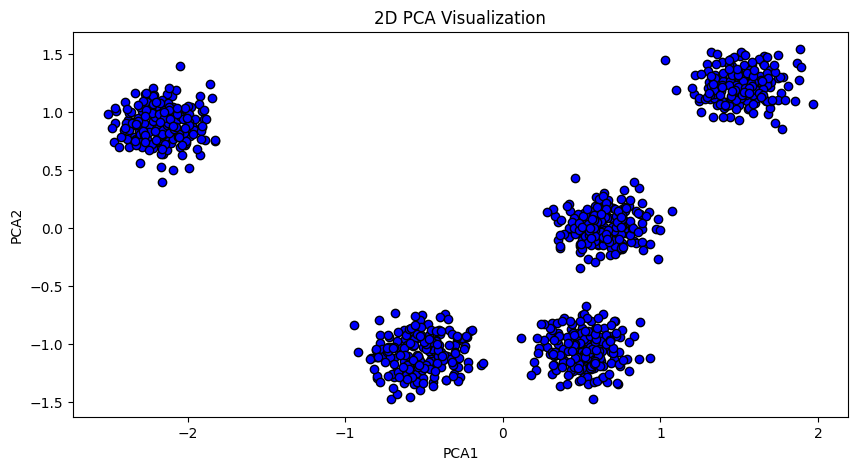

In [157]:
#Graph plotting
plt.figure(figsize=(10,5))
plt.scatter(pca_result[:,0],pca_result[:,1],c='b',edgecolor='k')
plt.title('2D PCA Visualization')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()